In [51]:
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
warnings.filterwarnings('ignore')

In [11]:
venv = os.path.dirname()
venv

NameError: name '__file__' is not defined

In [52]:
def get_hand_landmarks(image_path,vis=False,app=False):
    # Iniciar el framework de reconocimiento de coordenadas
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)
    mp_drawing = mp.solutions.drawing_utils

    # Leer y procesar la imagen
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    coords = np.empty((0,2))
    
    # Si hay resultados para las imágenes
    if results.multi_hand_landmarks:
        # Recuperar nodos de la imagen
        for hand_landmarks in results.multi_hand_landmarks:
            for idx, landmark in enumerate(hand_landmarks.landmark):
                # Extraer las coordenadas y guardarlas en lista
                h, w, c = image.shape
                cx, cy = int(landmark.x * w), int(landmark.y * h)
                coords = np.vstack((coords,np.array([cx,cy]).reshape(1,-1)))
            mp_drawing.draw_landmarks(image_rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    else:
        coords = np.zeros((21,2))
    
    hands.close()

    coords = [image_path.split('\\')[-2]] + scaler.fit_transform(coords).flatten().tolist()
    columns = ['letra']
    for i in range(21):
        columns.extend([f"x_{i}", f"y_{i}"])
    df = pd.DataFrame([coords], columns=columns)

    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')  # Ocultar los ejes
    plt.show()
    
    return df

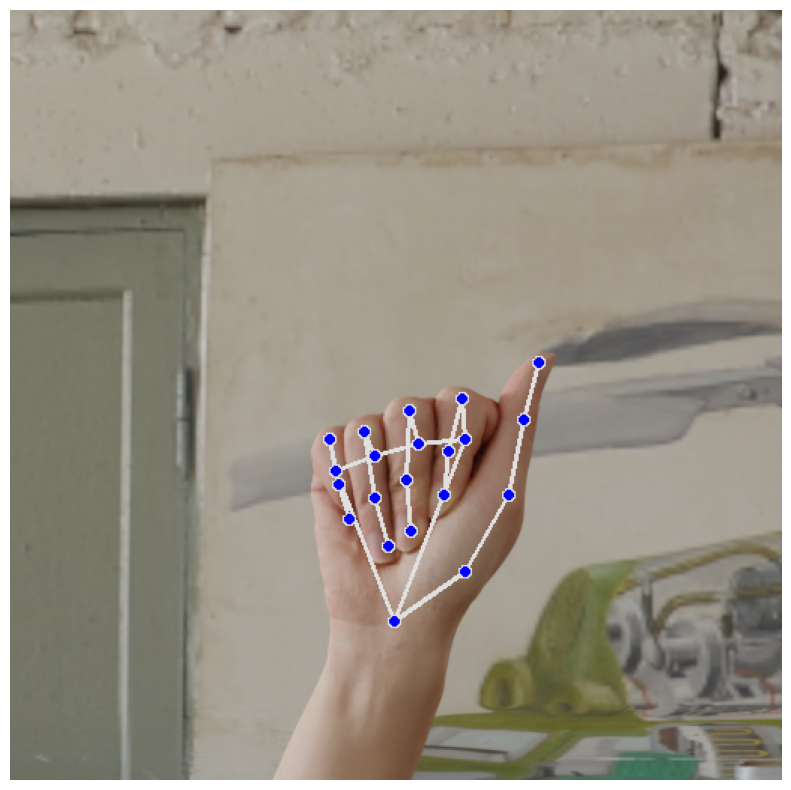

In [53]:
image = r'C:\Users\PC\Documents\GitHub Repos\sign-language-models\synthetic-asl-alphabet\Train_Alphabet\A\00fdcd18-e94a-452e-bdca-582478d46c98.rgb_0000.png'
a = get_hand_landmarks(image)

In [55]:
a

,letra,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,x_4,...,x_16,y_16,x_17,y_17,x_18,y_18,x_19,y_19,x_20,y_20
0,A,0.309353,1.0,0.647482,0.80814,0.856115,0.511628,0.928058,0.22093,1.0,...,0.280576,0.709302,0.028777,0.418605,0.0,0.296512,0.043165,0.47093,0.093525,0.604651
